In [1]:
# environment set up
import keras
from keras.models import Sequential
from keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import tensorflow as tf # only use tensorflow keras
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd

# working folder
directory = "/Users/Srikar/Desktop/Velexi/spectra-ml/data"
os.chdir(directory)

# print(os.getcwd())

Using TensorFlow backend.
/Users/Srikar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
# dataset = str(directory + "/dataset3")
# num_samples = len([name for name in os.listdir(dataset) if \
#                    os.path.isfile(os.path.join(dataset,name))])

# print(num_samples)

In [13]:
stddata_path = directory+"/Srikar-Standardized"
metadata = pd.read_csv(stddata_path+"/spectra-metadata.csv", sep="|")
metadata.head()

,spectrum_id,value_type,material,spectrometer_purity_code,measurement_type,raw_data_path
0,23077,reflectance,Rangeland C03-022 S12% G22%,ASDFRa,AREF,ChapterV_Vegetation/splib07a_Rangeland_C03-022...
1,22344,reflectance,Marsh SPAL92%...a CRMS322v78,ASDFRa,AREF,ChapterV_Vegetation/splib07a_Marsh_SPAL92%...a...
2,22136,reflectance,Tumbleweed ANP92-2C Dry,BECKa,AREF,ChapterV_Vegetation/splib07a_Tumbleweed_ANP92-...
3,24017,reflectance,Rangeland L02-069 S00% G99%,ASDFRa,AREF,ChapterV_Vegetation/splib07a_Rangeland_L02-069...
4,21060,reflectance,Douglas-Fir YNP-DF-1 forest,AVIRISb,RTGC,ChapterV_Vegetation/splib07a_Douglas-Fir_YNP-D...


In [19]:
metadata = metadata[metadata['value_type'] == "reflectance"]
metadata = metadata[~metadata['spectrometer_purity_code'].str.contains("NIC4")]
metadata.shape

(1810, 6)

In [20]:
# def find_record(string):
#     ind = string.find("|")
#     return string[:ind]

In [21]:
# data = metadata.iloc[0]
# type(data)

# metadata[metadata["material"].str.match("Chlor")].shape[0]

In [28]:
record_nums = []
y = []
spectrum_names = []

for i in range(metadata.shape[0]):
    data = metadata.iloc[i, :]
    if data[2].find("Actinolite") != -1: # if material name contains actinolite
        record_nums.append(data[0])
        y.append(int(0))
        spectrum_names.append("Actinolite")
    elif data[2].find("Alun") != -1:
        record_nums.append(data[0])
        y.append(int(1))
        spectrum_names.append("Alunite")
    elif (data[2].find("Chlorit") != -1 or data[2].find("Chlor") != -1 or data[2].find("Chlor+") != -1 or data[2].find("Chl.") != -1):
        record_nums.append(data[0])
        y.append(int(2))
        spectrum_names.append("Chlorite")

y = np.reshape(y, (len(y), 1))
num_samples = len(record_nums)
print(num_samples)
print(len(y))
print(type(y))

82
82
<class 'numpy.ndarray'>


In [29]:
spectrum_len = 500
spectra = np.zeros((num_samples,spectrum_len))
wavelengths = np.zeros((1,spectrum_len))

# y = np.zeros((num_samples, 1))

In [30]:
# import shutil

# for num in actinolite:
#     shutil.copy2(stddata_path+"/{}.csv".format(num), directory+"/Std_Actinolite")
# for num in alunite:
#     shutil.copy2(stddata_path+"/{}.csv".format(num), directory+"/Std_Alunite")
# for num in chlorite:
#     shutil.copy2(stddata_path+"/{}.csv".format(num), directory+"/Std_Chlorite")

In [31]:
num_neg = 0
for i in range(num_samples):
    hasnegative = False
    data = pd.read_csv(stddata_path+"/{}.csv".format(record_nums[i]))
    if i == 0:
        wavelengths[i,:] = data.iloc[:, 0].to_numpy()
    spectra[i,:] = data.iloc[:, 1].to_numpy()
    for j in range(spectrum_len):
        if spectra[i,j] < 0:
            hasnegative = True
            spectra[i,j] = 0
    if hasnegative:
        print(record_nums[i])
        num_neg += 1
# print(num_neg)
# wavelengths
# print(record_nums[43])
# print(spectra[43])

In [32]:
# spectrum_len = 480
# spectra = np.zeros((num_samples,spectrum_len))

# spectrum_categories = np.zeros(num_samples)
# first_record_of_mixtures_chapter = 11602
# is_a_mineral = 1                                   # these numbers match the chapter numbers given by usgs
# is_a_mixture = 2
# spectrum_names = ["" for x in range(num_samples)]

# y = np.zeros((num_samples, 1))

# os.chdir(dataset)

# i = 0

# for filename in os.listdir(dataset):
#     file_object  = open(filename, 'r').readlines()
# #     strip off header, add to matrix 'spectra'
#     spectra[i,:] = file_object[1:]

# #     label spectrum class, based on header
# #     actinolite: 0, alunite: 1, chlorite: 2
#     material_name = file_object[0]
    
#     spectrum_names[i] = material_name
    
#     start = 'Record='
#     end = ':'
#     record_number = int((material_name.split(start))[1].split(end)[0])
#     # print(record_number)
#     if record_number < first_record_of_mixtures_chapter:
#         spectrum_categories[i] = is_a_mineral
#     else:
#         spectrum_categories[i] = is_a_mixture

# #     print(material_name)

#     if material_name.find('Actinolite',) != -1: # if material name contains actinolite
#         y[i,0] = 0
#     elif material_name.find('Alun',)!= -1:
#         y[i,0] = 1
#     else: # chlorite
#         y[i,0] = 2

# #     turn missing points into 0
#     for j in range(spectrum_len):
#         if spectra[i,j] < 0:
#             spectra[i,j] = 0
#     i+=1

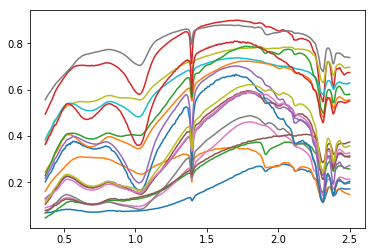

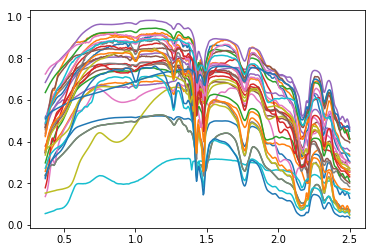

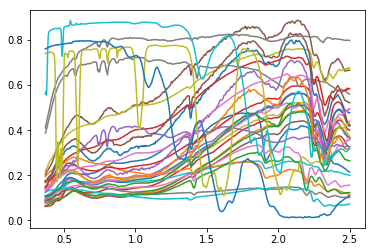

In [33]:
# --- plot the classes

# plot each class in a separate plot
# plot spectra names in legend
# plot minerals and mixtures w diff line widths

mineral_names = ["Actinolite", "Alunite", "Chlorite"]

# variables
num0 = 0 #number of samples of class 0
num1 = 0
num2 = 0

mineral_linewidth = 1         # linewidth = 1 is default
mixture_linewidth = 3         

# count the number of each class to make spectra0, spectra1, spectra2 databases
for i in range(num_samples):
    if y[i,0]== 0:
        num0 += 1
    elif y[i,0]== 1:
        num1 += 1
    elif y[i,0]== 2:
        num2 += 1

# make class-specific databases spectra0, ...1, ...2
spectra0 = np.zeros((num0,spectrum_len)) 
spectra1 = np.zeros((num1,spectrum_len)) 
spectra2 = np.zeros((num2,spectrum_len)) 

labels0 = ["" for x in range(num0)]
labels1 = ["" for x in range(num1)]
labels2 = ["" for x in range(num2)]

linewidth0 = np.zeros(num0)
linewidth1 = np.zeros(num1)
linewidth2 = np.zeros(num2)


# make counters for each database to place spectra
i0 = 0
i1 = 0
i2 = 0

# set linewidth for the spectrum 
# populate class-specific databases spectra0, ...1, ...2
for i in range(num_samples):
    
    # set linewidth
    #testcode
    #print(spectrum_categories)
    #print(spectrum_categories[i])
    
#     if spectrum_categories[i] == is_a_mineral:
#         linewidth = mineral_linewidth
        
#         #testcode
#         #print('min')
#     else: 
#         linewidth = mixture_linewidth
    linewidth = 2
        
        #testcode
        #print('mix')
    
    # populate matrices for making each class plot
    if y[i,0]== 0:
        spectra0[i0,:] = spectra[i,:]
        labels0[i0] = spectrum_names[i]
        linewidth0[i0] = linewidth
        i0 +=1
    elif y[i,0]== 1:
        spectra1[i1,:] = spectra[i,:]
        labels1[i1] = spectrum_names[i]
        linewidth1[i1] = linewidth
        i1 +=1
    else:
        spectra2[i2,:] = spectra[i,:]
        labels2[i2] = spectrum_names[i]
        linewidth2[i2] = linewidth
        i2 +=1

# plot each class-specific database separately
for i in range(i0):
#     fig = plt.figure()
#     plt.plot(range(1, spectrum_len+1), spectra0[i,:], label = labels0[i], linewidth = linewidth0[i]) # remove linewidth for all mixtures/minerals to be standard
    plt.plot(wavelengths[0,:], spectra0[i,:]) # remove linewidth for all mixtures/minerals to be standard
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()
#     path = "/Users/Srikar/Desktop/Velexi/spectra-ml/lab-notebook/smunukutla/plots/" + mineral_names[0] + str(i) + ".png"
#     fig.savefig(path, format = "PNG")
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i1):
#     plt.plot(range(1, spectrum_len+1), spectra1[i,:], label = labels1[i], linewidth = linewidth1[i])
    plt.plot(wavelengths[0,:], spectra1[i,:])
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i2):
#     plt.plot(range(1, spectrum_len+1), spectra2[i,:], label = labels2[i], linewidth = linewidth2[i])
    plt.plot(wavelengths[0,:], spectra2[i,:])
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [34]:
sample_indices = list(range(0, num_samples))
print(num_samples)
random.shuffle(sample_indices)
train_set_size = 3*(num_samples//5)
dev_set_size = (num_samples//5)
test_set_size= num_samples-dev_set_size - train_set_size
print(train_set_size)
print(test_set_size)
print(dev_set_size)
train_set_indices = sample_indices[:train_set_size]
dev_set_indices = sample_indices[train_set_size: train_set_size+dev_set_size]
test_set_indices= sample_indices[train_set_size+dev_set_size: num_samples]
print(train_set_indices)
print(test_set_indices)
print(dev_set_indices)

train_set = spectra[train_set_indices, :]
train_labels = y[train_set_indices, :]
dev_set = spectra[dev_set_indices, :]
dev_labels = y[dev_set_indices, :]
test_set = spectra[test_set_indices, :]
test_labels = y[test_set_indices, :]

82
48
18
16
[64, 16, 29, 63, 48, 8, 24, 78, 51, 81, 25, 80, 28, 75, 9, 5, 68, 40, 74, 2, 49, 46, 23, 71, 35, 79, 38, 3, 13, 19, 61, 1, 21, 65, 52, 4, 66, 72, 76, 55, 42, 33, 54, 62, 34, 30, 15, 69]
[6, 73, 36, 0, 39, 67, 60, 22, 26, 59, 47, 43, 18, 14, 70, 32, 31, 77]
[50, 53, 27, 58, 41, 37, 10, 45, 20, 12, 11, 57, 7, 56, 17, 44]


In [35]:
train_labels = train_labels.flatten()
dev_labels = dev_labels.flatten()
test_labels = test_labels.flatten()
# type(train_labels)

In [36]:
# len(train_set)
# len(train_set[17])
print(test_set.shape)

(18, 500)


In [37]:
train_set = np.reshape(train_set, (train_set.shape[0], spectrum_len, 1))
dev_set = np.reshape(dev_set, (dev_set.shape[0], spectrum_len, 1))
test_set = np.reshape(test_set, (test_set.shape[0], spectrum_len, 1))

train_labels = np.reshape(train_labels, (train_labels.shape[0], 1))
dev_labels = np.reshape(dev_labels, (dev_labels.shape[0], 1))
test_labels = np.reshape(test_labels, (test_labels.shape[0], 1))

train_labels = to_categorical(train_labels)
dev_labels = to_categorical(dev_labels)
test_labels = to_categorical(test_labels)

In [38]:
print(train_labels)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [39]:
model = Sequential()
# model.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model.add(Conv1D(64, 25, activation='relu', input_shape=(train_set.shape[1], 1)))
model.add(Conv1D(64, 25, activation='relu'))
model.add(MaxPooling1D(4)) # 108 by 64 so far
model.add(Conv1D(100, 25, activation='relu'))
model.add(Conv1D(100, 25, activation='relu'))
model.add(MaxPooling1D(4))
# model.add(Dropout(0.5))
# model.add(GlobalAveragePooling1D())
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 476, 64)           1664      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 452, 64)           102464    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 113, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 89, 100)           160100    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 65, 100)           250100    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 16, 100)           0         
_________________________________________________________________
flat

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 12
EPOCHS = 50

print(train_labels.shape)
model.fit(train_set, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=(dev_set, dev_labels)) 

(48, 3)
Instructions for updating:
Use tf.cast instead.
Train on 48 samples, validate on 16 samples
Epoch 1/50
48/48 [==============================] - 1s 27ms/step - loss: 1.2390 - acc: 0.2500 - val_loss: 1.0525 - val_acc: 0.4375
Epoch 2/50
48/48 [==============================] - 1s 15ms/step - loss: 1.0707 - acc: 0.4167 - val_loss: 1.0764 - val_acc: 0.4375
Epoch 3/50
48/48 [==============================] - 1s 13ms/step - loss: 1.0758 - acc: 0.4167 - val_loss: 1.0509 - val_acc: 0.4375
Epoch 4/50
48/48 [==============================] - 1s 16ms/step - loss: 1.0417 - acc: 0.4375 - val_loss: 0.9638 - val_acc: 0.8125
Epoch 5/50
48/48 [==============================] - 1s 16ms/step - loss: 1.0118 - acc: 0.6042 - val_loss: 0.9053 - val_acc: 0.7500
Epoch 6/50
48/48 [==============================] - 1s 15ms/step - loss: 0.9365 - acc: 0.6250 - val_loss: 0.8956 - val_acc: 0.5000
Epoch 7/50
48/48 [==============================] - 1s 27ms/step - loss: 0.8880 - acc: 0.5208 - val_loss: 0.7920 -

In [41]:
y_pred = model.predict(test_set)
y_pred

array([[3.81309671e-11, 9.99999642e-01, 3.70547866e-07],
       [2.68444806e-01, 6.73430145e-01, 5.81250750e-02],
       [9.99783695e-01, 2.16106739e-04, 2.91996798e-07],
       [5.03133499e-08, 9.99966741e-01, 3.32176751e-05],
       [1.84497307e-15, 9.99999762e-01, 1.85961767e-07],
       [1.73828217e-17, 1.00000000e+00, 8.83435991e-10],
       [4.98913978e-05, 5.66172248e-11, 9.99950051e-01],
       [9.45575913e-15, 1.00000000e+00, 3.15975157e-08],
       [1.04053468e-08, 9.99903798e-01, 9.62451159e-05],
       [9.99996662e-01, 3.46330040e-08, 3.38947416e-06],
       [9.58394408e-01, 1.45781338e-02, 2.70274840e-02],
       [9.99999762e-01, 1.61626771e-11, 2.09966416e-07],
       [9.26236692e-12, 9.99998331e-01, 1.65465508e-06],
       [4.33148118e-03, 6.06862269e-02, 9.34982300e-01],
       [8.52036569e-03, 2.29978547e-09, 9.91479635e-01],
       [7.58701438e-14, 9.99999881e-01, 1.08662505e-07],
       [2.20011249e-12, 9.99997616e-01, 2.39421342e-06],
       [2.29829151e-08, 1.70589

In [42]:
test_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [43]:
model.evaluate(test_set, test_labels)

18/18 [==============================] - 0s 4ms/step


[0.07975012809038162, 0.9444444179534912]